In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# Load the dataset
data = pd.read_csv('Language Detection.csv', encoding='utf-8')

In [ ]:
# value count for each language
data["Language"].value_counts()

Malayalam    130
Konkani      110
Kannada      110
English      108
Nepali       103
Assamese     102
Tamil        102
Marathi      102
Sanskrit     102
Odia         102
Bengali      101
Urdu         101
Gujarati     101
Punjabi      101
Hindi        100
Telugu        99
Kashmiri      96
Name: Language, dtype: int64

In [ ]:
print(data.head(10))

                                                Text   Language
0   The distinction between nominative and accusa...    English
1       ತರಬೇತಿಗೆ ಹಾಜರಾಗಲು ಆಸಕ್ತಿಯಿರುವ ರೈತರು ಆಧಾರ್...    Kannada
2  शेणै गोंयबाबान , जाणे कोंकणी पुणोर्जिवन कार्या...    Konkani
3   இவர்கள், போர் நடவடிக்கைகளில் சிறந்து விளங்கிய...      Tamil
4  ૨૦૧૧ની વસ્તી ગણતરી મુજબ, ભારતમાં વક્તાઓની સંખ્...   Gujarati
5   ह्या झातिंक नोव्या प्रांतांत , थोंइच्या स्थान...    Konkani
6   मराठी भाषेचा उदय संस्‍कृतचा प्रभावाखाली निर्म...    Marathi
7  കുഴന്തൈ തമിഴർക്കു് കൊളന്തെ എന്നു മാറിയരൂപത്തിൽ...  Malayalam
8  എന്നാൽ ഈ സ്വാധീനം രാജാക്കന്മാരിലും മറ്റുമായിരു...  Malayalam
9                    कोंकणी लेखांत interest वाढ्ल्या    Konkani


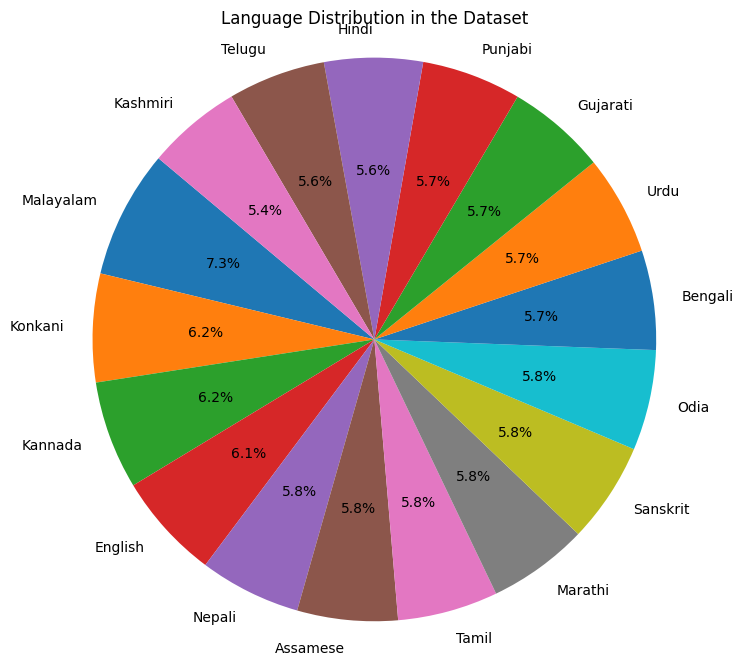

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data["Language"].value_counts(), labels=data["Language"].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution in the Dataset')

# Show the plot
plt.axis('equal')
plt.show()

In [ ]:
# Data Preprocessing
data.dropna(subset=['Text'], inplace=True)  # Drop rows with missing text data
X = data['Text']
y = data['Language']

In [ ]:
# Check for and handle any other missing values
X = X.fillna('')  # Fill missing text data with an empty string

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Text Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Implement Multinomial Naive Bayes algorithm
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
nb_predictions = nb_classifier.predict(X_test_vec)

In [ ]:
# Calculate accuracy for Multinomial Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Multinomial Naive Bayes Accuracy: {nb_accuracy:.2f}")

Multinomial Naive Bayes Accuracy: 0.91


In [ ]:
# Step 5: Implement SVM algorithm
svm_classifier = SVC()
svm_classifier.fit(X_train_vec, y_train)
svm_predictions = svm_classifier.predict(X_test_vec)

In [ ]:
# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.81


In [ ]:
#  Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

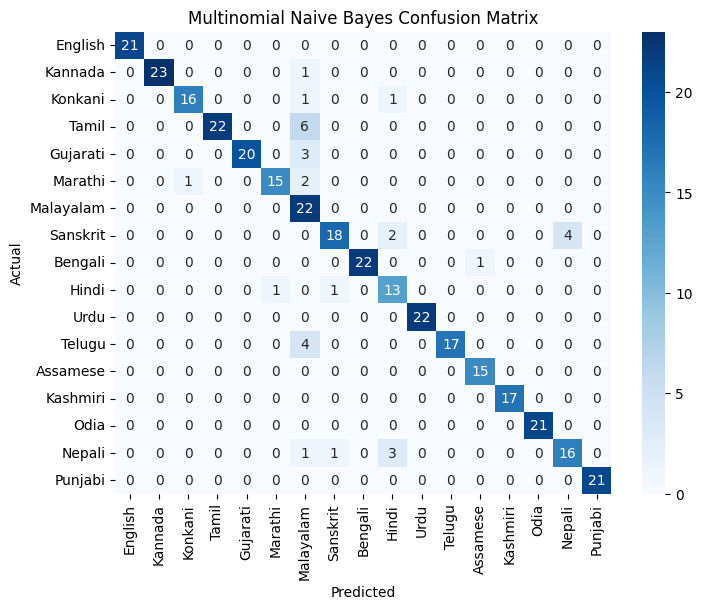

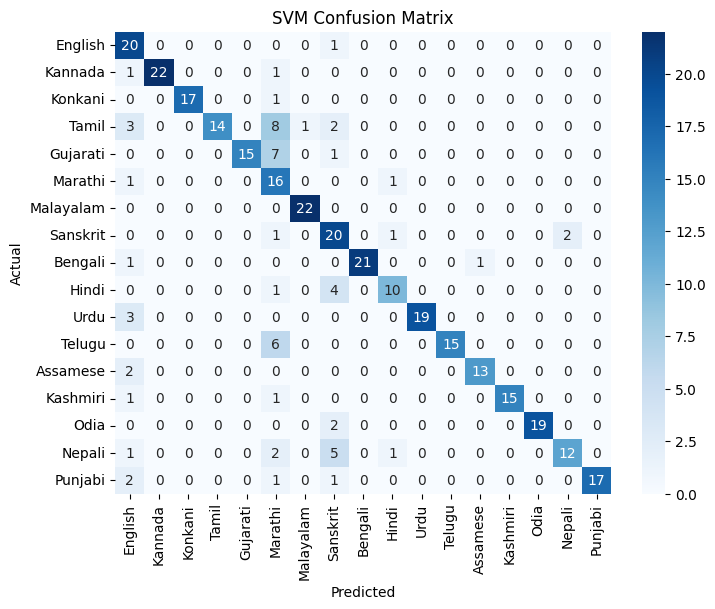

In [ ]:
unique_labels = data['Language'].unique()

plot_confusion_matrix(y_test, nb_predictions, labels=unique_labels, title='Multinomial Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test, svm_predictions, labels=unique_labels, title='SVM Confusion Matrix')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def train_language_detection_model(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path, encoding='utf-8')

    # Data Preprocessing
    data.dropna(subset=['Text'], inplace=True)  # Drop rows with missing text data
    X = data['Text']
    y = data['Language']

    # Check for and handle any other missing values
    X = X.fillna('')  # Fill missing text data with an empty string

    # Text Vectorization using CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X)

    # Create and train the Multinomial Naive Bayes model
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_vec, y)

    return nb_classifier, vectorizer

def predict_language(model, vectorizer, text):
    # Vectorize the input text
    text_vec = vectorizer.transform([text])

    # Predict the language
    predicted_language = model.predict(text_vec)

    return predicted_language[0]

# Example of using the functions
model, vectorizer = train_language_detection_model('Language Detection.csv')
text_to_predict = "This is an example sentence in English."
predicted_language = predict_language(model, vectorizer, text_to_predict)
print(f"Predicted Language: {predicted_language}")



Predicted Language: English


Decision Tree Accuracy: 0.80


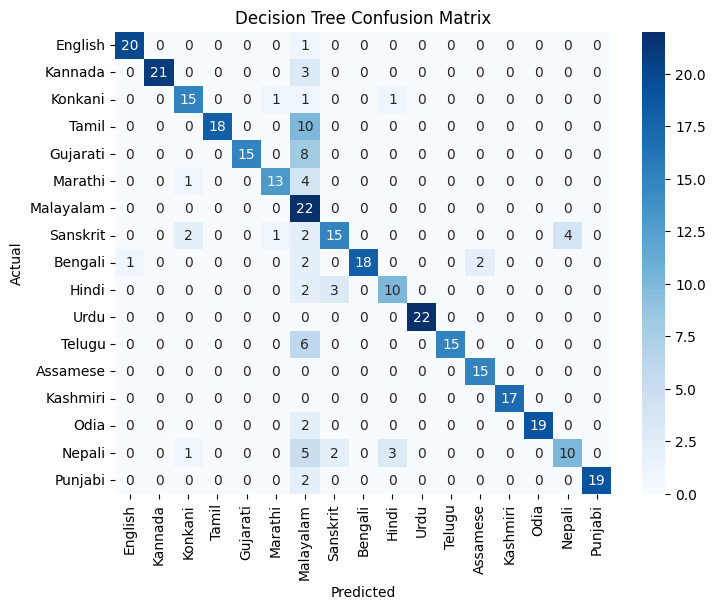

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Source

def train_and_evaluate_language_models(data_path):
    # Step 1: Load the dataset
    data = pd.read_csv(data_path, encoding='utf-8')

    # Step 2: Data Preprocessing
    data.dropna(subset=['Text'], inplace=True)  # Drop rows with missing text data
    X = data['Text']
    y = data['Language']

    # Check for and handle any other missing values
    X = X.fillna('')  # Fill missing text data with an empty string

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Text Vectorization using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Step 4: Implement Decision Tree algorithm
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train_vec, y_train)
    dt_predictions = dt_classifier.predict(X_test_vec)

    # Calculate accuracy for Decision Tree
    dt_accuracy = accuracy_score(y_test, dt_predictions)
    print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

    # Step 5: Plot confusion matrix
    def plot_confusion_matrix(y_true, y_pred, labels, title):
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title)
        plt.show()

    # Get the unique language labels
    unique_labels = data['Language'].unique()

    plot_confusion_matrix(y_test, dt_predictions, labels=unique_labels, title='Decision Tree Confusion Matrix')

    # Step 6: Save the Decision Tree as an image
    export_graphviz(dt_classifier, out_file='decision_tree.dot',
                    feature_names=vectorizer.get_feature_names_out(),
                    class_names=dt_classifier.classes_,
                    filled=True, rounded=True, special_characters=True)

    Source.from_file('decision_tree.dot').view()

# Example usage:
data_path = 'Language Detection.csv'
train_and_evaluate_language_models(data_path)


Logistic Regression Accuracy: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3374 (\N{MALAYALAM LETTER MA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Matplotlib currently does not support Malayalam natively.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3378 (\N{MALAYALAM LETTER LA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3375 (\N{MALAYALAM LETTER YA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: U

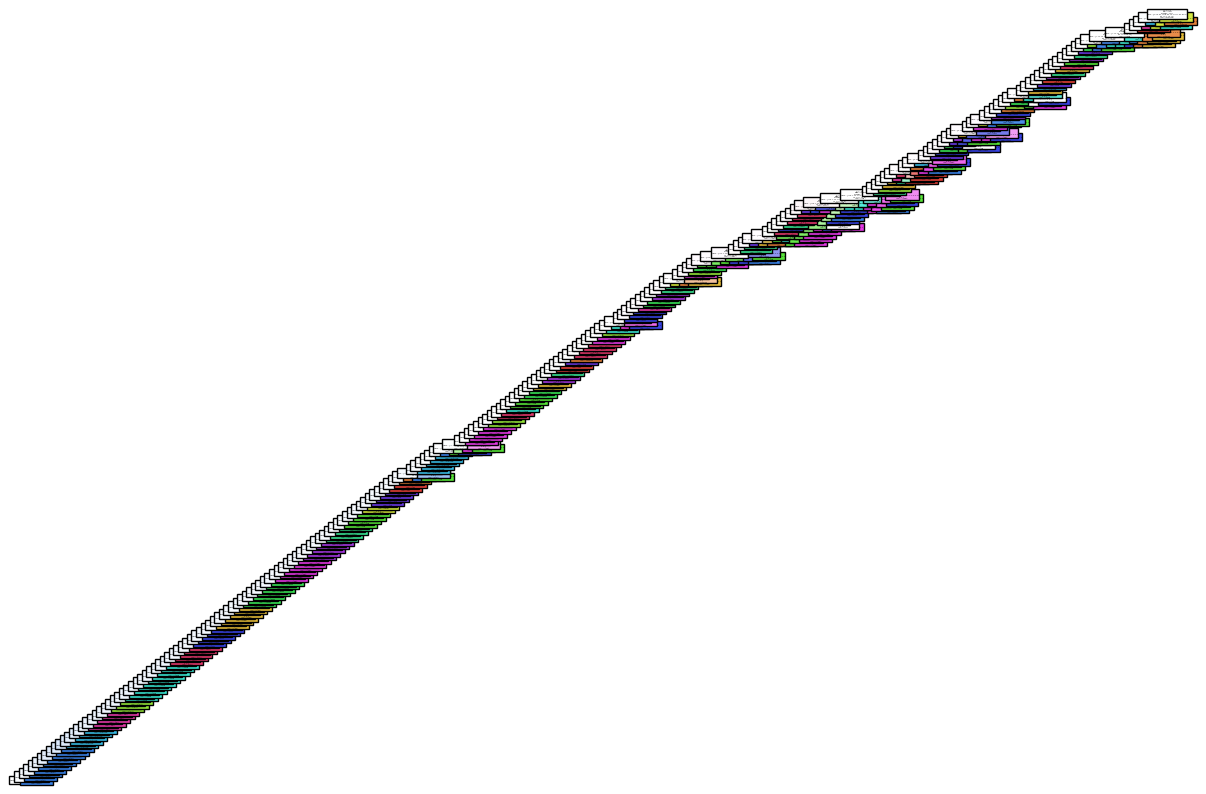

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Load the dataset
data = pd.read_csv('Language Detection.csv', encoding='utf-8')

# Step 2: Data Preprocessing
data.dropna(subset=['Text'], inplace=True)  # Drop rows with missing text data
X = data['Text']
y = data['Language']

# Check for and handle any other missing values
X = X.fillna('')  # Fill missing text data with an empty string

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Text Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Implement Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vec, y_train)
logistic_predictions = logistic_model.predict(X_test_vec)

# Calculate accuracy for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

# Step 5: Plot Decision Tree for Feature Importance
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec, y_train)

# Visualize the Decision Tree for feature importance
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=dt_classifier.classes_)
plt.show()


Small Decision Tree Accuracy: 0.18


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3374 (\N{MALAYALAM LETTER MA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Matplotlib currently does not support Malayalam natively.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3378 (\N{MALAYALAM LETTER LA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 3375 (\N{MALAYALAM LETTER YA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: U

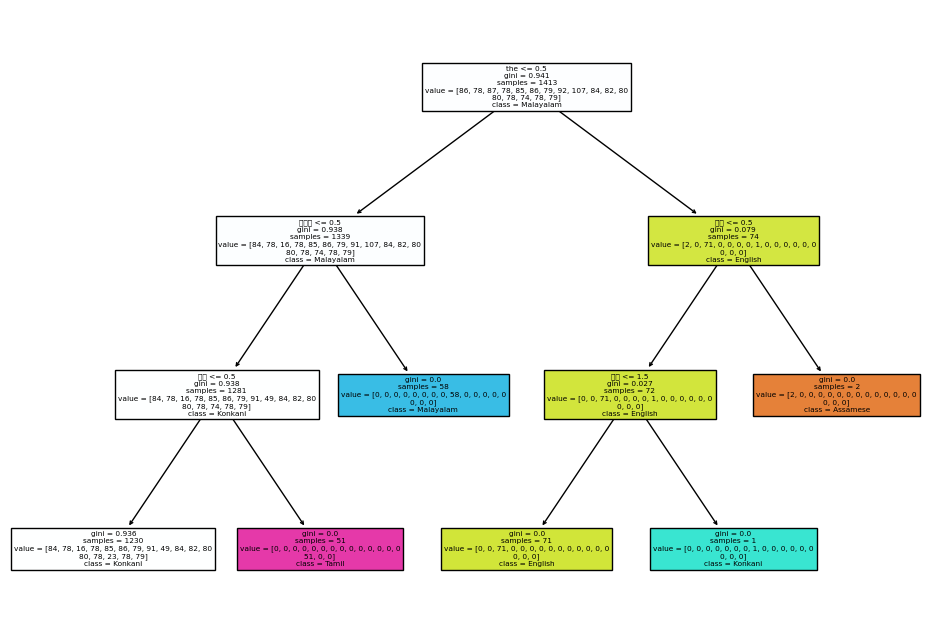

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('Language Detection.csv', encoding='utf-8')

# Step 2: Data Preprocessing
data.dropna(subset=['Text'], inplace=True)  # Drop rows with missing text data
X = data['Text']
y = data['Language']

# Check for and handle any other missing values
X = X.fillna('')  # Fill missing text data with an empty string


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Text Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Implement a small Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=3)  # Limit the tree depth
dt_classifier.fit(X_train_vec, y_train)
dt_predictions = dt_classifier.predict(X_test_vec)

# Calculate accuracy for the small Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Small Decision Tree Accuracy: {dt_accuracy:.2f}")

# Step 5: Save the small Decision Tree as a high-resolution image
plt.figure(figsize=(12, 8))  # Increase the figure size for clarity
plot_tree(dt_classifier, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=dt_classifier.classes_)
plt.savefig('decision_tree.png', dpi=300)  # Save as a high-resolution image
plt.show()
